### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_excel('Tamil Nadu.xlsx')

In [3]:
df.head()

,Year,Population,Male,Female
0,1901,19252630,9419398,9833232
1,1911,20902616,10236951,10665665
2,1921,21628518,10659489,10969029
3,1931,23472099,11577988,11894111
4,1941,26267507,13056967,13210540


#### Normalizing the Data

In [4]:
scaler = MinMaxScaler()
df[['Population']] = scaler.fit_transform(df[['Population']])

In [5]:
df1 = df[['Year','Population']]

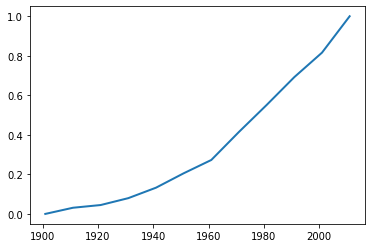

In [6]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)

## Prediction on Population

In [7]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9887658531865261

In [8]:
#training on the whole dataset
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [10]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [11]:
pred

[1.1848789817394163,
 1.3827213561500002,
 1.5936659684086862,
 1.8171805838837827]

In [12]:
dfTest['Population'] = pred


In [13]:
df1 = df1.append(dfTest,ignore_index=True)
df1.tail(5)

,Year,Population
11,2011,1.000000
12,2021,1.184879
13,2031,1.382721
14,2041,1.593666
15,2051,1.817181


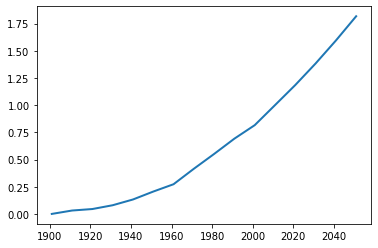

In [14]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)


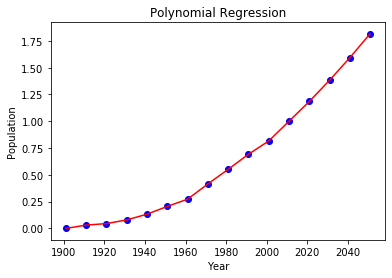

In [15]:
# Visualising the Polynomial Regression results
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show()

### WRT Unproportioned Scale

In [16]:
pred = []
for i in df1['Population']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [17]:
pred

[19252630.0,
 20902616.0,
 21628518.0,
 23472099.0,
 26267507.0,
 30119047.0,
 33686953.0,
 41199168.0,
 48408077.0,
 55858946.0,
 62405679.0,
 72147030.0,
 81926093.0,
 92390847.0,
 103548635.0,
 115371307.0]

In [18]:
df1['Population'] = pred


In [19]:
df1

,Year,Population
0,1901,19252630.0
1,1911,20902616.0
2,1921,21628518.0
3,1931,23472099.0
4,1941,26267507.0
5,1951,30119047.0
6,1961,33686953.0
7,1971,41199168.0
8,1981,48408077.0
9,1991,55858946.0


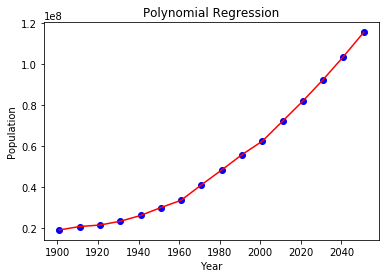

In [20]:
# Visualising the Polynomial Regression results 
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show() 

### Male Population

In [21]:
scaler = MinMaxScaler()
df[['Male']] = scaler.fit_transform(df[['Male']])

In [22]:
df2 = df[['Year','Male']]
df2

,Year,Male
0,1901,0.000000
1,1911,0.030599
2,1921,0.046413
3,1931,0.080790
4,1941,0.136144
5,1951,0.209005
6,1961,0.280388
7,1971,0.426992
8,1981,0.563961
9,1991,0.706609


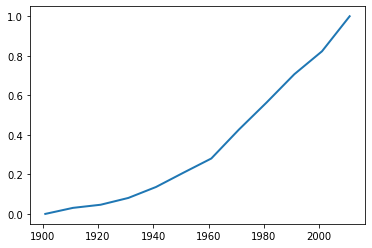

In [23]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)


In [24]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9990553894693578

In [25]:
#training on the whole dataset
X = df2['Year'].values.reshape(-1,1)
y = df2['Male'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [27]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [28]:
pred

[1.174806016730372, 1.3572091949495189, 1.5474616411479474, 1.7443483843908325]

In [29]:
dfTest['Male'] = pred

In [30]:
df2 = df2.append(dfTest,ignore_index=True)
df2

,Year,Male
0,1901,0.000000
1,1911,0.030599
2,1921,0.046413
3,1931,0.080790
4,1941,0.136144
5,1951,0.209005
6,1961,0.280388
7,1971,0.426992
8,1981,0.563961
9,1991,0.706609


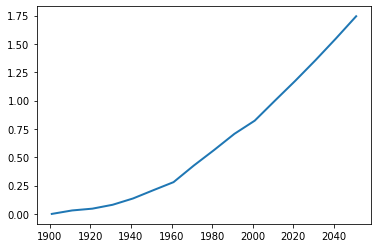

In [31]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)

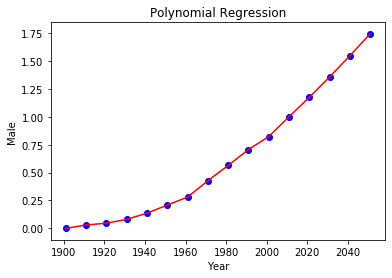

In [32]:
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

#### WRT UNSCALED MALE

In [33]:
pred = []
for i in df2['Male']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [34]:
pred

[9419398.0,
 10236951.0,
 10659489.0,
 11577988.0,
 13056967.0,
 15003724.0,
 16910978.0,
 20828021.0,
 24487624.0,
 28298975.0,
 31400909.0,
 36137975.0,
 40808543.0,
 45682096.0,
 50765371.0,
 56025905.0]

In [35]:
df2['Male'] = pred
df2

,Year,Male
0,1901,9419398.0
1,1911,10236951.0
2,1921,10659489.0
3,1931,11577988.0
4,1941,13056967.0
5,1951,15003724.0
6,1961,16910978.0
7,1971,20828021.0
8,1981,24487624.0
9,1991,28298975.0


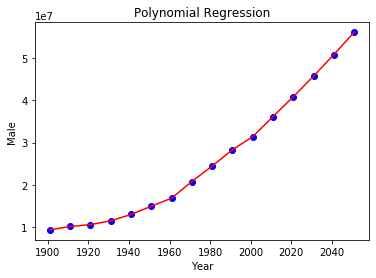

In [36]:
# Visualising the Polynomial Regression results 
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

### Female Population

In [37]:
scaler = MinMaxScaler()
df[['Female']] = scaler.fit_transform(df[['Female']])

In [38]:
df3 = df[['Year','Female']]
df3.head()

,Year,Female
0,1901,0.000000
1,1911,0.031802
2,1921,0.043391
3,1931,0.078732
4,1941,0.129024


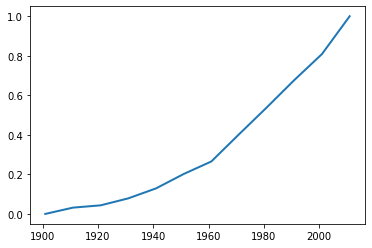

In [39]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

In [40]:
#train-test set creation
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9393113605639076

In [41]:
#train on whole dataset
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [43]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [44]:
pred

[1.1951608088715346, 1.4087625101847436, 1.6408283392041767, 1.891522954096942]

In [45]:
dfTest['Female'] = pred

In [46]:
df3 = df3.append(dfTest,ignore_index=True)
df3.tail(5)

,Year,Female
11,2011,1.000000
12,2021,1.195161
13,2031,1.408763
14,2041,1.640828
15,2051,1.891523


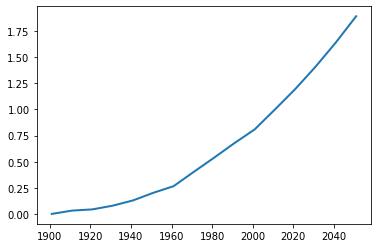

In [47]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

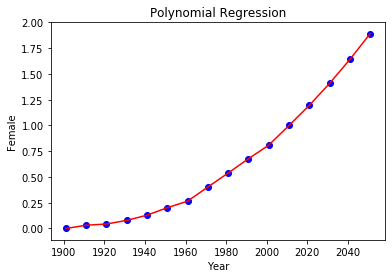

In [48]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

# WRT Unscaled Population

In [49]:
pred = []
for i in df3['Female']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [50]:
pred

[9833232.0,
 10665665.0,
 10969029.0,
 11894111.0,
 13210540.0,
 15115323.0,
 16775975.0,
 20371147.0,
 23920453.0,
 27559971.0,
 31004770.0,
 36009055.0,
 41117550.0,
 46708750.0,
 52783264.0,
 59345402.0]

In [51]:
df3['Female'] = pred

In [52]:
df3

,Year,Female
0,1901,9833232.0
1,1911,10665665.0
2,1921,10969029.0
3,1931,11894111.0
4,1941,13210540.0
5,1951,15115323.0
6,1961,16775975.0
7,1971,20371147.0
8,1981,23920453.0
9,1991,27559971.0


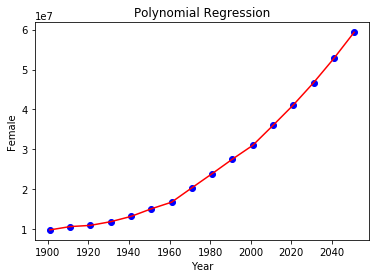

In [53]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

In [54]:
df4 = pd.concat([df1,df2,df3], axis =1)

In [55]:
df4

,Year,Population,Year,Male,Year,Female
0,1901,19252630.0,1901,9419398.0,1901,9833232.0
1,1911,20902616.0,1911,10236951.0,1911,10665665.0
2,1921,21628518.0,1921,10659489.0,1921,10969029.0
3,1931,23472099.0,1931,11577988.0,1931,11894111.0
4,1941,26267507.0,1941,13056967.0,1941,13210540.0
5,1951,30119047.0,1951,15003724.0,1951,15115323.0
6,1961,33686953.0,1961,16910978.0,1961,16775975.0
7,1971,41199168.0,1971,20828021.0,1971,20371147.0
8,1981,48408077.0,1981,24487624.0,1981,23920453.0
9,1991,55858946.0,1991,28298975.0,1991,27559971.0
